In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

# Tempel

**tempel_limpio_full.dat**: DR12 SDSS sample of galaxies

    - galID   :ID galaxia (SDSS)
    - ra[rad] :Asención recta
    - dec[rad]:Declinacion
    - zCMB   :Galaxy redshift corrected to the CMB rest-frame.
    - rextAB :r-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - gextAB :g-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - uextAB :u-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - rabs :r-band k-corrected absolute magnitude.
    - gabs :g-band k-corrected absolute magnitude.
    - uabs :u-band k-corrected absolute magnitude.
    - pr50r
    - pr90r

In [100]:
path_gal_gru = '../../tempel_limpio_full.dat'


df = pd.read_table(path_gal_gru, sep="\s+", 
                   names=['galID', 'ra_rad', 'dec_rad', 'zCMB', 'rextAB', 'gextAB', 'uextAB','rabs','gabs','uabs','r50','r90'])

display(df.shape)
display(df.head(2))

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(557560, 12)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
0,1237648674533278744,4.302659,0.006149,0.052364,17.364889,17.821471,18.909773,-18.737809,-18.279416,-17.279459,0.569502,0.070849
1,1237648674533475041,4.309919,0.005997,0.072661,16.853414,17.245356,18.359844,-19.985221,-19.580926,-18.556690,0.286968,0.035967


In [101]:
df.describe()

,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
count,557559.000000,557559.000000,557559.000000,557559.000000,557559.000000,557559.000000,5.575590e+05,5.575590e+05,5.575590e+05,557559.000000,557559.000000
mean,3.243881,0.472808,0.098996,16.841969,17.538159,19.117289,-4.288245e+04,-7.799938e+06,-1.829504e+05,-3.943346,-3.459585
std,0.660586,0.311077,0.044951,0.795484,32.870037,32.879931,1.343592e+07,2.449441e+09,5.756026e+07,64.301729,58.183065
min,1.915685,-0.065414,0.000146,9.446938,-9999.215704,-9999.329663,-4.868005e+09,-9.083556e+11,-2.149379e+10,-1000.000000,-1000.000000
25%,2.713526,0.212609,0.065501,16.508394,17.265486,18.679025,-2.126564e+01,-2.053466e+01,-1.892145e+01,0.105959,0.020443
50%,3.237212,0.452644,0.095587,17.071351,17.846251,19.315659,-2.064086e+01,-1.995347e+01,-1.838208e+01,0.181085,0.031037
75%,3.799847,0.707482,0.132439,17.416182,18.237686,19.927133,-1.985715e+01,-1.922515e+01,-1.773673e+01,0.346420,0.050370
max,4.570260,1.226423,0.199999,17.767403,20.485298,31.490886,-5.657943e+00,-4.260592e+00,5.316580e+01,77.060870,245.390600


In [105]:
#display(df.shape)
#df = df[df.applymap(np.isreal).all(1)]
display(df.shape)
df1 = df[(df['gextAB'] > 10) & (df['uextAB'] > 10)]
display(df1.shape)

(524288, 12)

(524288, 12)

Text(0, 0.5, 'dec')

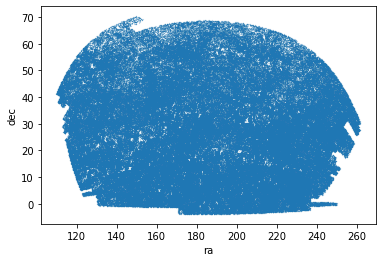

In [109]:
import math
pi = math.pi
plt.scatter(df1.ra_rad * 180/pi, df1.dec_rad * 180/pi, s= 0.01)
plt.xlabel('ra')
plt.ylabel('dec')

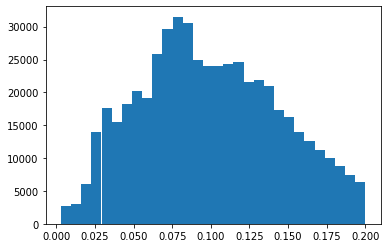

In [112]:
plt.hist(df1.zCMB, 30)
plt.show()

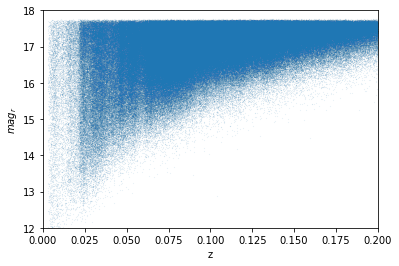

In [114]:
plt.scatter(df1.zCMB, df1.rextAB, s= 0.001)
plt.xlabel('z')
plt.ylabel(r'$mag_r$')
plt.xlim(0,0.2)
plt.ylim(12,18)
plt.show()

In [115]:
display(df1.shape)
df1.head(2)

(524288, 12)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
0,1237648674533278744,4.302659,0.006149,0.052364,17.364889,17.821471,18.909773,-18.737809,-18.279416,-17.279459,0.569502,0.070849
1,1237648674533475041,4.309919,0.005997,0.072661,16.853414,17.245356,18.359844,-19.985221,-19.580926,-18.556690,0.286968,0.035967


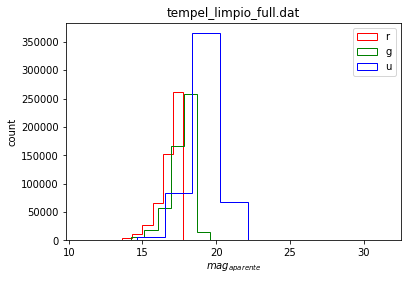

In [117]:
plt.hist(df1.rextAB, histtype='step', label='r', color='red')
plt.hist(df1.gextAB, histtype='step', label='g', color='green')
plt.hist(df1.uextAB, histtype='step', label='u', color='blue')
plt.ylabel('count')
plt.xlabel(r'$mag_{aparente}$')
plt.title('tempel_limpio_full.dat')
plt.legend()
plt.show()

## Color aparente g-r

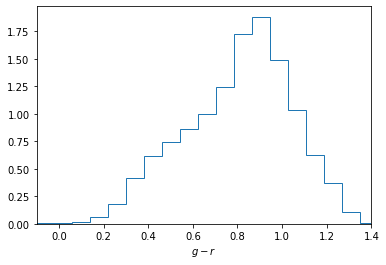

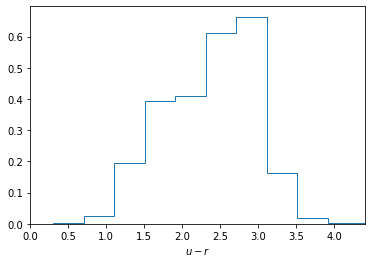

In [124]:
g_r = df1.gextAB - df1.rextAB
plt.hist(g_r, 50, histtype='step', density=True)
plt.xlim(-0.1, 1.4)
plt.xlabel(r'$g-r$')
plt.show()
u_r = df1.uextAB - df1.rextAB
plt.hist(u_r, 50, histtype='step', density=True)
plt.xlim(0.0, 4.4)
plt.xlabel(r'$u-r$')
plt.show()

## Color Mags Absolutas

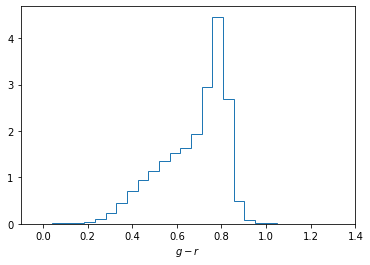

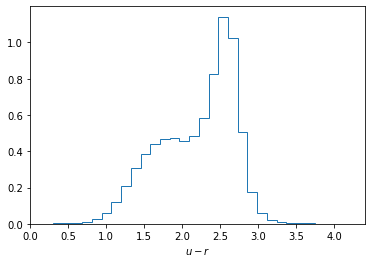

In [128]:
g_r = df1.gabs - df1.rabs
plt.hist(g_r, 500, histtype='step', density=True)
plt.xlim(-0.1, 1.4)
plt.xlabel(r'$g-r$')
plt.show()
u_r = df1.uabs - df1.rabs
plt.hist(u_r, 500, histtype='step', density=True)
plt.xlim(0.0, 4.4)
plt.xlabel(r'$u-r$')
plt.show()

## Radios Petro

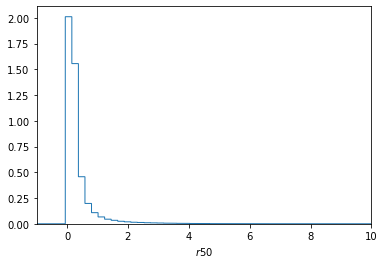

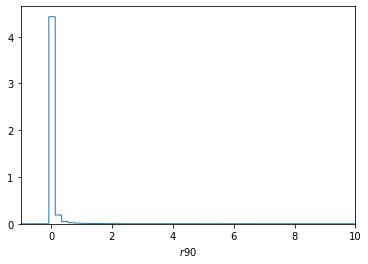

In [142]:
r50 = df1.r50
plt.hist(r50, 5000, histtype='step', density=True)
plt.xlim(-1, 10)
plt.xlabel(r'$r50$')
plt.show()
r90 = df1.r90
plt.hist(r90, 5000, histtype='step', density=True)
plt.xlim(-1, 10)
plt.xlabel(r'$r90$')
plt.show()

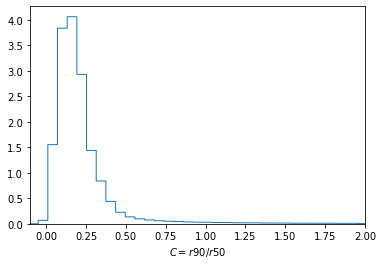

In [152]:
ty=r90/r50
plt.hist(ty, 500000, histtype='step', density=True)
plt.xlim(-0.1, 2)
plt.xlabel(r'$C=r90/r50$')
plt.show()

# **Correcion K**

In [153]:
dfk = pd.read_table("../../tempel_kcorr_full.dat", sep="\s+", names=['z', 'mr', 'kr', 'mg', 'kg', 'mu', 'ku'])
#dfk = pd.read_table("tempel_kcorr.dat", sep="\s+", names=['z', 'kr'])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
dfk.head(3)

,z,mr,kr,mg,kg,mu,ku
0,0.052364,-18.737809,0.039653,-18.279416,0.037841,-17.279459,0.126186
1,0.072661,-19.985221,0.033622,-19.580926,0.021269,-18.556690,0.111522
2,0.164124,-22.615471,0.191124,-21.722567,0.542133,-19.553588,0.656998


In [158]:
display(dfk.shape)
dfk = dfk[dfk.applymap(np.isreal).all(1)]
display(dfk.shape)

(524288, 7)

(524288, 7)

In [159]:
display(min(dfk.z), max(dfk.z))
display(min(dfk.kr), max(dfk.kr))
display(min(dfk.mr), max(dfk.mr))
display(min(dfk.mg), max(dfk.mg))

0.002990793

0.199999215

-15.275464595446476

0.2661166817020086

-24.757483973264044

-8.035602811519478

-31.284714771895448

-9.894293380909117

In [249]:
indx = np.where(
    (dfk.mu > -27.) & (dfk.mu < -15.)
    & (dfk.mg > -27.) & (dfk.mg < -15.)
    & (dfk.kr > -1.5) & (dfk.kg > -1.5)
    & (dfk.ku > -1.5) & (dfk.ku > -1.5))
display(np.shape(indx))


(1, 519914)

In [250]:
zz=dfk.z.values[indx]
r=dfk.mr.values[indx]
g=dfk.mg.values[indx]
u=dfk.mu.values[indx]
kkr=dfk.kr.values[indx]
kkg=dfk.kg.values[indx]
kku=dfk.ku.values[indx]


display(min(zz), max(zz))
display(min(r), max(r))
display(min(g), max(g))
display(min(kkr), max(kkr))
display(min(kkg), max(kkg))

0.003058093

0.199999215

-24.757483973264044

-14.984795809257712

-25.845297349050803

-15.005241747254132

-0.3980922192924142

0.2661166817020086

-1.499758384282238

2.2267011442389784

In [253]:
#dfk.values[indx]

array([[0.052364394, -18.737809495401937, 0.039653394733393674, ...,
        0.03784123796387713, -17.27945852637257, 0.1261859257040216],
       [0.072661344, -19.98522061158192, 0.033621948187576495, ...,
        0.021269389553270526, -18.556690320947784, 0.1115216575534409],
       [0.1641239049999999, -22.615470714199063, 0.1911235185793824, ...,
        0.5421329103401978, -19.55358823443093, 0.6569980388112479],
       ...,
       [0.184298854, -21.45023607118598, 0.1857333972928253, ...,
        0.5975925948159616, -18.794160298320342, 0.6477965244271886],
       [0.120130195, -20.684536252420667, 0.04153623210597803, ...,
        0.1642990226599689, -18.80546348970069, 0.1448999893860048],
       [0.106441547, -20.845292791123537, 0.09313330110614688, ...,
        0.2794977651821667, -18.274328283984595, 0.3018813039672049]],
      dtype=object)

In [185]:
display(kkr)
display(zz)

array([0.03965339, 0.03362195, 0.19112352, ..., 0.1857334 , 0.04153623,
       0.0931333 ])

array([0.052364394, 0.072661344, 0.1641239049999999, ..., 0.184298854,
       0.120130195, 0.106441547], dtype=object)

In [186]:
kkr.shape

(519914,)

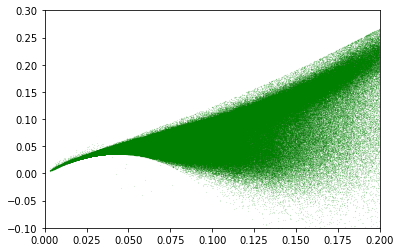

In [187]:
plt.plot(zz,kkr, 'g.',linestyle='None', markersize=0.10)

plt.xlim(0,0.2)
plt.ylim(-0.1,0.3)

plt.show()

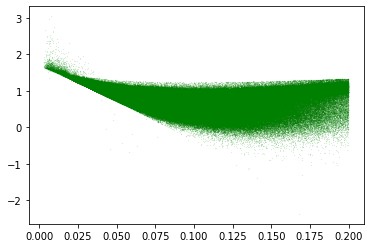

In [188]:
plt.plot(zz,kkr/zz, 'g.',linestyle='None', markersize=0.1)
plt.show()

## Muestra mas chica p/graficar

In [269]:
dfk1 = dfk[(dfk.mu > -27.) & (dfk.mu < -15.)
    & (dfk.mg > -27.) & (dfk.mg < -15.)
    & (dfk.kr > -1.5) & (dfk.kg > -1.5)
    & (dfk.ku > -1.5) & (dfk.ku > -1.5)]
display(np.shape(dfk1))
df_new=dfk1.sample(n=50000)
np.shape(df_new)
df_new.head(3)

(519914, 7)

,z,mr,kr,mg,kg,mu,ku
41033,0.064727,-19.135093,0.031687,-18.775218,0.006415,-17.970677,0.110510
95109,0.161615,-21.680097,0.045346,-21.067646,0.163004,-19.797857,0.194532
222600,0.126347,-21.349819,0.093117,-20.593713,0.321014,-18.940374,0.302942


In [270]:
zz=df_new.z.values
r=df_new.mr.values
g=df_new.mg.values
u=df_new.mu.values
kkr=df_new.kr.values
kkg=df_new.kg.values
kku=df_new.ku.values

In [271]:
ic1 = np.where(((u-r) > 0.0) & ((u-r)<= 1.5))
ic2 = np.where(((u-r) > 1.5) & ((u-r)<= 2.0))
ic3 = np.where(((u-r) > 2.0) & ((u-r)<= 2.5))
ic4 = np.where(((u-r) > 2.5) & ((u-r)<= 3.0))
ic5 = np.where(((u-r) > 3.0) & ((u-r)<= 4.0))
np.shape(ic1),np.shape(ic2),np.shape(ic3),np.shape(ic4),np.shape(ic5)

((1, 5436), (1, 11236), (1, 15624), (1, 17024), (1, 633))

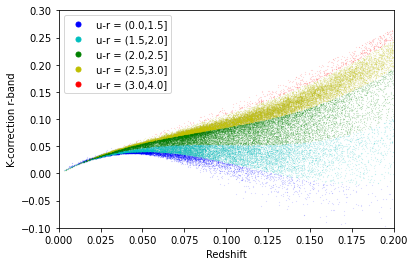

In [288]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1], 'b.', markersize=0.1,label='u-r = (0.0,1.5]') #,linestyle='None'
ax.plot(zz[ic2], kkr[ic2], 'c.', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kkr[ic3], 'g.', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kkr[ic4], 'y.', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kkr[ic5], 'r.', markersize=0.1,label='u-r = (3.0,4.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,0.3)

ax.set_xlabel('Redshift')
ax.set_ylabel('K-correction r-band')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

#ax.set_rasterized(True)
#fig.savefig('test_kcorr.eps', format='eps')
#fig.savefig('test_kcorr.pdf', format='pdf')

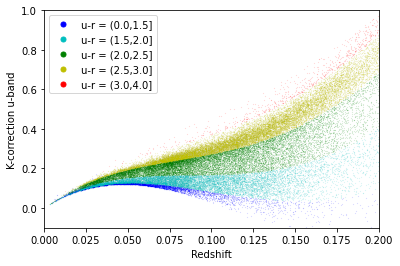

In [286]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kku[ic1], 'b.',linestyle='None', markersize=0.1,label='u-r = (0.0,1.5]')
ax.plot(zz[ic2], kku[ic2], 'c.',linestyle='None', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kku[ic3], 'g.',linestyle='None', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kku[ic4], 'y.',linestyle='None', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kku[ic5], 'r.',linestyle='None', markersize=0.1,label='u-r = (3.0,4.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,1.0)

ax.set_xlabel('Redshift')
ax.set_ylabel('K-correction u-band')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()
#ax.set_rasterized(True)
#fig.savefig('test_kcorr_u.eps', format='eps')

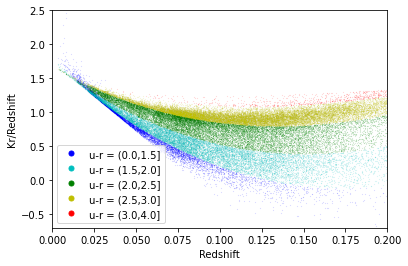

In [277]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1]/zz[ic1], 'b.',linestyle='None', markersize=0.1,label='u-r = (0.0,1.5]')
ax.plot(zz[ic2], kkr[ic2]/zz[ic2], 'c.',linestyle='None', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kkr[ic3]/zz[ic3], 'g.',linestyle='None', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kkr[ic4]/zz[ic4], 'y.',linestyle='None', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kkr[ic5]/zz[ic5], 'r.',linestyle='None', markersize=0.1,label='u-r = (3.0,4.0]')
ax.set_xlim(0,0.2)
ax.set_ylim(-0.7,2.5)
ax.set_xlabel('Redshift')
ax.set_ylabel('Kr/Redshift')

plt.legend()
ax.legend(loc='lower left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

# Color g-r (Mabs)

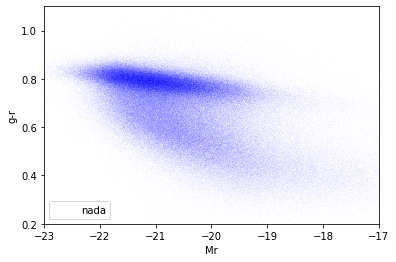

In [52]:
fig, ax = plt.subplots()
#ax.plot(r[ic1], g[ic1] - r[ic1], 'b.',linestyle='None', markersize=0.1,label='(0.0,0.4]')
#ax.plot(r[ic2], g[ic2] - r[ic2], 'c.',linestyle='None', markersize=0.1,label='(0.4,0.6]')
#ax.plot(r[ic3], g[ic3] - r[ic3], 'g.',linestyle='None', markersize=0.1,label='(0.6,0.7]')
#ax.plot(r[ic4], g[ic4] - r[ic4], 'y.',linestyle='None', markersize=0.1,label='(0.7,0.8]')
#ax.plot(r[ic5], g[ic5] - r[ic5], 'r.',linestyle='None', markersize=0.1,label='(0.8,1.0]')
ax.plot(r, g - r, 'b.',linestyle='None', markersize=0.01,label='nada')
ax.set_ylim(0.2,1.1)
ax.set_xlim(-23,-17)
ax.set_xlabel('Mr')
ax.set_ylabel('g-r')

ax.legend(loc='lower left')
plt.show()

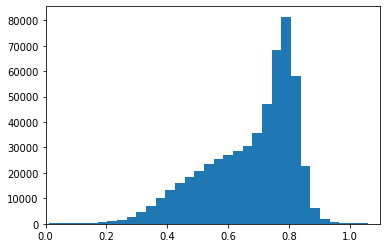

In [53]:
fig, ax = plt.subplots()
ax.hist(g - r, 200)
ax.set_xlim(0,1.1)
plt.show()

In [54]:
np.shape(g - r),min(g-r),max(g-r)

((555851,), -2.783058381860954, 3.570606889717311)

In [55]:
color=g - r
c1=np.where((r >= -23.) & (r < -22.))

In [56]:
iz = np.where((zz>0.0) & (zz<0.05))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

TypeError: '>' not supported between instances of 'str' and 'float'

In [57]:
iz = np.where((zz>0.05) & (zz<0.1))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

TypeError: '>' not supported between instances of 'str' and 'float'

## GaussianMixture

In [29]:
xx=np.arange(-22.5,-17,0.4)
xx

array([-22.5, -22.1, -21.7, -21.3, -20.9, -20.5, -20.1, -19.7, -19.3,
       -18.9, -18.5, -18.1, -17.7, -17.3])

(12822,)

(12822, 1)

array([[0.74000105],
       [0.82362567]])

<bound method BaseMixture.score_samples of GaussianMixture(n_components=2, random_state=0)>

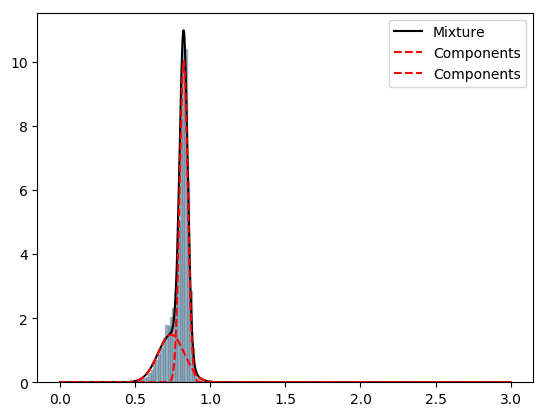

In [30]:
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
for i in range(2,3):
    icol = np.where((r >= xx[i]) & (r < xx[i+1])) 
    col = color[icol]
    display(np.shape(col)) 
    col = col.reshape(-1, 1)
    display(np.shape(col))    
    gm = GaussianMixture(n_components=2, random_state=0).fit(col)
    display(gm.means_)
    weights = gm.weights_
    means = gm.means_
    covars = gm.covariances_
    plt.hist(col, bins=100, histtype='bar', density=True, ec='grey', alpha=0.5)
    #plt.plot(col,weights[0]*stats.norm.pdf(col,means[0],np.sqrt(covars[0])))
    #plt.rcParams['agg.path.chunksize'] = 10000
    x_range = np.linspace(0, 3, 1000)
    pdf = np.exp(gm.score_samples(x_range.reshape(-1, 1)))
    responsibilities = gm.predict_proba(x_range.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x_range, pdf, '-k', label='Mixture')
    plt.plot(x_range, pdf_individual, '--r', label='Components')
    plt.legend()
    display(gm.score_samples)
    plt.show()
    

## Clean data

In [58]:
display('Valores faltantes',dfk.notnull().all().to_frame())
display('Estadísticos del dataset',dfk.z.describe())
display('Estadísticos del dataset',dfk.mr.describe())
display('Estadísticos del dataset',dfk.kr.describe())
display('Estadísticos del dataset',dfk.mg.describe())
display('Estadísticos del dataset',dfk.kg.describe())

'Valores faltantes'

,0
z,True
mr,False
kr,False
mg,False
kg,False
mu,False
ku,False


'Estadísticos del dataset'

count     557560.000000
unique    556711.000000
top            0.084863
freq           3.000000
Name: z, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean    -4.288245e+04
std      1.343592e+07
min     -4.868005e+09
25%     -2.126564e+01
50%     -2.064086e+01
75%     -1.985715e+01
max     -5.657943e+00
Name: mr, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean     4.286207e+04
std      1.343592e+07
min     -1.527546e+01
25%      4.036532e-02
50%      6.509413e-02
75%      9.901398e-02
max      4.868005e+09
Name: kr, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean    -7.799938e+06
std      2.449441e+09
min     -9.083556e+11
25%     -2.053466e+01
50%     -1.995347e+01
75%     -1.922515e+01
max     -4.260592e+00
Name: mg, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean     7.799918e+06
std      2.449441e+09
min     -7.531051e+00
25%      8.318749e-02
50%      1.786107e-01
75%      2.983857e-01
max      9.083556e+11
Name: kg, dtype: float64

In [59]:
#Valores duplicados
dfk[dfk.duplicated()].sort_values(['z'])

,z,mr,kr,mg,kg,mu,ku


In [60]:
dfk['mr'] = dfk['mr'].astype(float, errors = 'raise')

In [65]:
#dfk[dfk.ku.str.contains('*************')]
#dfk[dfk.ku.str.contains(-99.99)]

In [35]:
#df_raro = dfk[dfk.kr == '*************']

In [36]:
#df_raro

In [70]:
#dfk.kr.hist()

In [71]:
#dfk.select_dtypes(['float']).columns
#dfk.select_dtypes(['string']).columns
#dfk.select_dtypes(['object']).columns

In [72]:
#dfk.iloc[dfk.z.dtypes == np.float64, :]

In [73]:
is_NaN = dfk.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dfk[row_has_NaN]
print(rows_with_NaN)

                                              z  mr  kr  mg  kg  mu  ku
557559  #z,rabs,kcorr,gabs,kcorr_g,uabs,kcorr_u NaN NaN NaN NaN NaN NaN


In [74]:
dfna= dfk[dfk['mr'].isna()]

In [75]:
dfna.shape

(1, 7)

In [43]:
#dfk2=dfk.fillna(-999)
#df. dropna() 

In [76]:
cdf = dfk[~dfk.applymap(np.isreal).all(1)]

In [77]:
display(cdf.min())
display(cdf.max())

z     #z,rabs,kcorr,gabs,kcorr_g,uabs,kcorr_u
mr                         -4868005210.356782
kr                                  -7.566859
mg                       -908355641017.580933
kg                                   -1.66024
mu                        -21493794963.858009
ku                                 -29.530859
dtype: object

z     9.9998542999999995E-002
mr                  -5.657943
kr          4868005189.957377
mg                  -4.260592
kg        908355630980.689331
mu                  20.265846
ku         21493784926.878941
dtype: object

In [46]:
#cdf.mr.hist()

In [78]:
cdf.shape

(33272, 7)

In [79]:
bfk = dfk[dfk.applymap(np.isreal).all(1)]

In [80]:
bfk.head(10)

,z,mr,kr,mg,kg,mu,ku
0,0.052364,-18.737809,0.039653,-18.279416,0.037841,-17.279459,0.126186
1,0.072661,-19.985221,0.033622,-19.580926,0.021269,-18.556690,0.111522
2,0.164124,-22.615471,0.191124,-21.722567,0.542133,-19.553588,0.656998
3,0.068271,-21.055557,0.070048,-20.274898,0.164020,-18.480570,0.236256
4,0.075081,-20.128469,0.053055,-19.515439,0.127579,-18.123988,0.167187
5,0.087324,-19.808906,0.085715,-18.967248,0.231497,-17.141538,0.283969
6,0.068221,-19.281626,0.042988,-18.756575,0.077092,-17.579661,0.135537
7,0.134727,-20.916685,0.138491,-20.114406,0.352763,-18.048850,0.461221
8,0.186074,-21.747605,0.186614,-20.942012,0.574705,-19.108826,0.652410
9,0.186451,-21.645719,0.125141,-20.929446,0.401270,-19.427039,0.456358


In [81]:
bfk.shape


(524288, 7)

In [82]:
bfk.mr.dtype

dtype('float64')

In [83]:
bfk['mr'] = bfk['mr'].astype(float, errors = 'raise')

/home/anto/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
bfk['mr'].dtype

dtype('float64')

array([[<AxesSubplot:title={'center':'mr'}>,
        <AxesSubplot:title={'center':'kr'}>],
       [<AxesSubplot:title={'center':'mg'}>,
        <AxesSubplot:title={'center':'kg'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'ku'}>]], dtype=object)

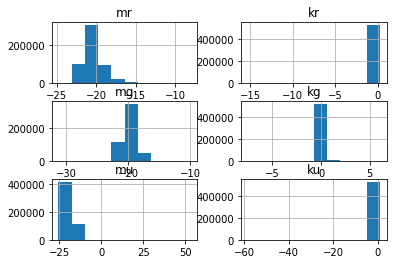

In [85]:
bfk.hist()